Целью данного задания является разработка модели регрессии для предсказания медианных цен на жильё в Калифорнии, используя набор данных из переписи населения 1990 года. Задача будет решаться с помощью модели решающего дерева (DecisionTreeRegressor), с особым вниманием к влиянию определённых гиперпараметров на производительность модели.



 **1. Изучение и подготовка данных**

Загрузите датасет fetch_california_housing и создайте DataFrame для удобства работы.

Выведите описание датасета, чтобы ознакомиться с признаками и целевой переменной. Используйте:

 print(housing.DESCR)

df.describe()

Выполните базовый анализ данных: проверьте распределение признаков и целевой переменной, а также наличие пропущенных значений.



**2. Разделение данных**

Разделите данные на обучающую и тестовую выборки, используя соотношение 80% к 20%.



**3. Обучение модели**

Создайте модель DecisionTreeRegressor с гиперпараметрами max_depth=3, max_features=4 и random_state=105. Обучите модель на обучающей выборке.



**4. Оценка модели**

Используйте модель для предсказания цен на жильё в тестовой выборке и оцените качество модели, используя метрики MSE и RMSE.



**5. Визуализация и анализ результатов**

Визуализируйте обученное дерево решений с использованием функции plot_tree.

Определите и визуализируйте важность признаков для модели решающего дерева. Обсудите, какие признаки оказали наибольшее влияние на предсказания цен на жильё и предположите, почему.

Определите важность признаков с использованием feature_importances_ и визуализируйте их:

importances = regressor.feature_importances_

indices = np.argsort(importances)[::-1]



In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

data = fetch_california_housing()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['target'] = data.target

print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [2]:
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [3]:
dataset.value_counts(normalize=True)

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup  Latitude  Longitude  target 
0.4999   10.0      6.740000   2.040000   108.0       2.160000  34.69     -116.90    0.55000    0.000048
4.2500   34.0      6.063910   0.996241   631.0       2.372180  38.53     -121.51    1.91900    0.000048
4.2458   52.0      3.912999   1.064483   1830.0      1.873081  37.80     -122.42    4.50000    0.000048
4.2454   33.0      6.073746   1.064897   1073.0      3.165192  34.12     -117.87    1.83800    0.000048
                   4.604207   1.021033   1644.0      3.143403  33.88     -118.36    2.36800    0.000048
                                                                                                 ...   
2.8919   52.0      5.140506   1.089873   2290.0      2.898734  34.10     -118.14    2.58400    0.000048
2.8917   33.0      4.699346   1.009804   1378.0      4.503268  34.20     -118.37    1.70400    0.000048
2.8913   23.0      5.038674   0.977901   1146.0      3.165746  36.43     -11

In [4]:
X = dataset.drop(columns='target')
y = dataset['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [5]:
model = DecisionTreeRegressor(max_depth=3, max_features=4, random_state=105)
model.fit(X_train, y_train)

prediction = model.predict(X_test)
MSE = mean_squared_error(y_test, prediction)

print(f"MSE:{MSE}")
print(f"RMSE:{MSE**(1/2)}")

MSE:0.7185373191406352
RMSE:0.8476658062825438


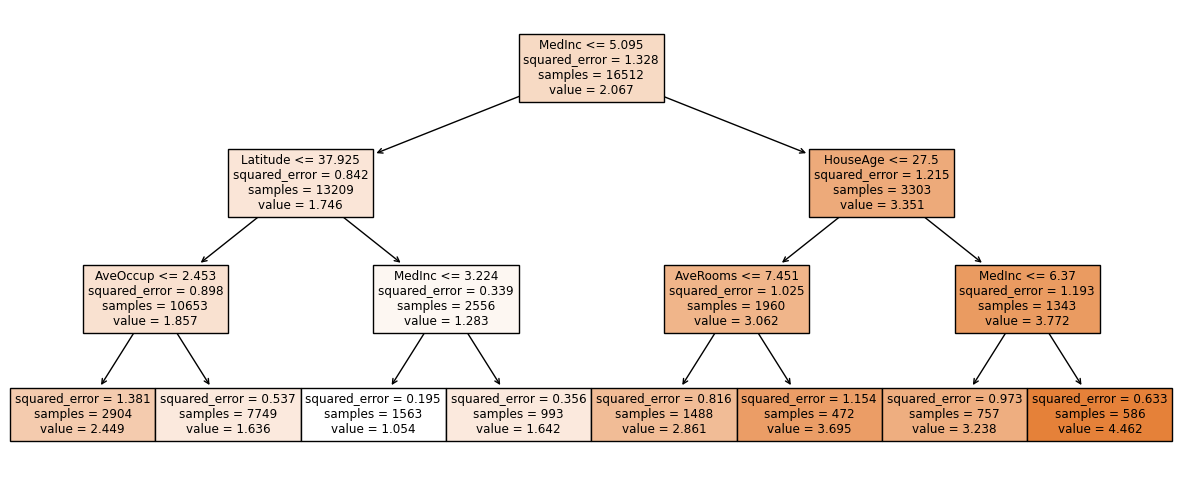

In [6]:
plt.figure(figsize=(15,6))
plot_tree(model, filled=True, feature_names=data.feature_names)
plt.show()

In [7]:
importances = model.feature_importances_
importance_dict = {model.feature_names_in_[i]: model.feature_importances_[i] for i in range(len(model.feature_names_in_))}
print(importance_dict)
indices = np.argsort(importances)[::-1]

{'MedInc': 0.7333678450407375, 'HouseAge': 0.039260315197547344, 'AveRooms': 0.0243807647402995, 'AveBedrms': 0.0, 'Population': 0.0, 'AveOccup': 0.1364419985218929, 'Latitude': 0.06654907649952284, 'Longitude': 0.0}


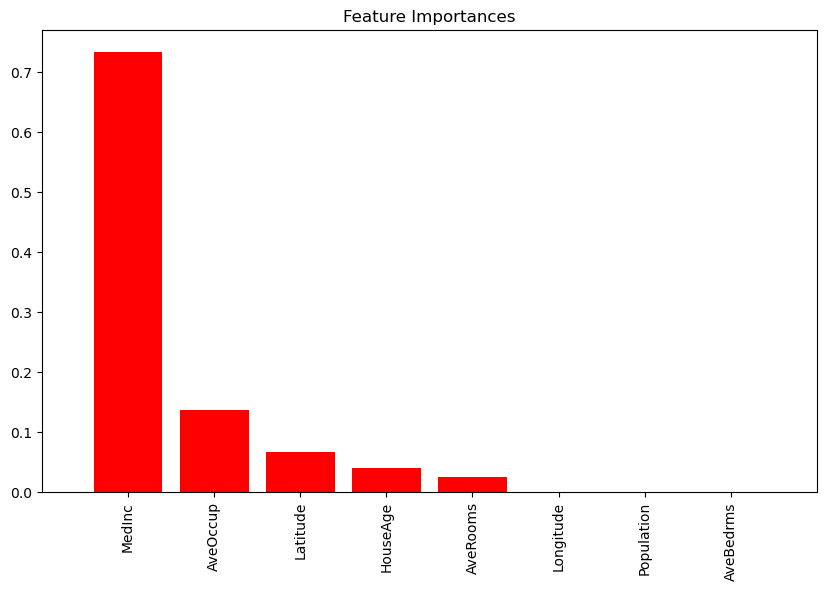

In [20]:
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], color="r")
plt.xticks(range(X.shape[1]), np.array(data.feature_names)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
